In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sources_path = './../sources'
if sources_path not in sys.path:
    sys.path.append(sources_path)
import utils


In [2]:
data_dir = './../data'
progbar = utils.ProgressBar(elapsed_time=True)
progbar.update_progress(0)

[0:00:00][----------] 0.00% 

In [3]:
profile = pd.read_json(os.path.join(data_dir, 'profile.json'), lines=True)
portfolio = pd.read_json(os.path.join(data_dir, 'portfolio.json'), lines=True)
transcript = pd.read_json(os.path.join(data_dir, 'transcript.json'), lines=True)

## 1. Processing Profile

In [4]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


### 1.1 Age

The `age` attribute have a null value of 118. Considering that an age attribute can be roughly modeled as having a normal distribution, we will replace these null values by the mean of the existing values.

In [6]:
profile['age'] = profile['age'].apply(lambda x: np.nan if x == float(118) else float(x))
profile['age'].fillna((profile['age'].mean()), inplace=True)
profile.head()

,age,became_member_on,gender,id,income
0,54.393524,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55.000000,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,54.393524,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75.000000,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,54.393524,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


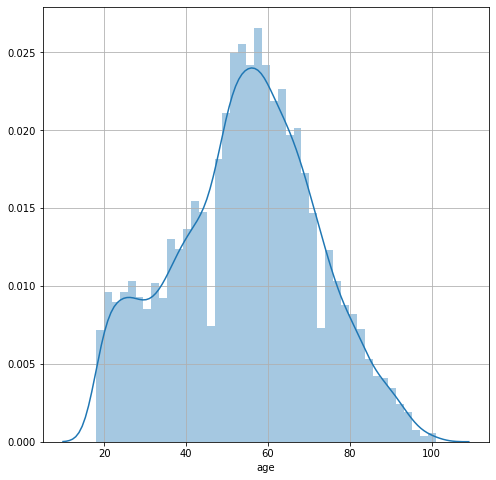

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(profile.dropna()['age'], ax=ax)
ax.grid(True)

### 1.2 Gender

The `gender` attribute has 4 original values: `F`, `M`, `O` (for others) and `Null`. We will replace the `Null` values by `O`.

In [8]:
profile['gender'] = profile['gender'].apply(lambda x: 'O' if x == None else x)

(0.0, 100.0, 0.0, 100.0)

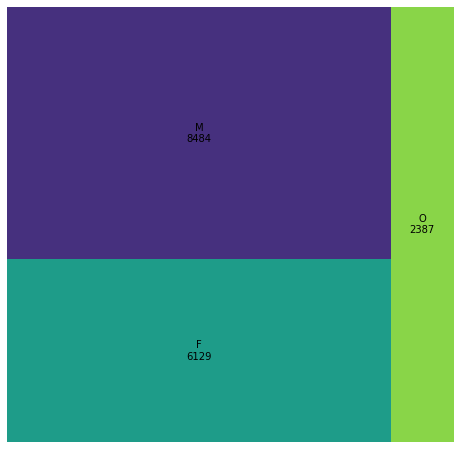

In [9]:
import squarify    # pip install squarify
fig, ax = plt.subplots(figsize=(8,8))
df_plot = profile.groupby(['gender']).count()['id'].reset_index(drop=False)
df_plot['gender'] = df_plot['gender'] + '\n' + df_plot['id'].astype(str)
squarify.plot(sizes=df_plot['id'], label=df_plot['gender'], alpha=1, ax=ax)
ax.axis('off')

### 1.3 Became Member on

In [10]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

C:\Users\joao.guedes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of customers')

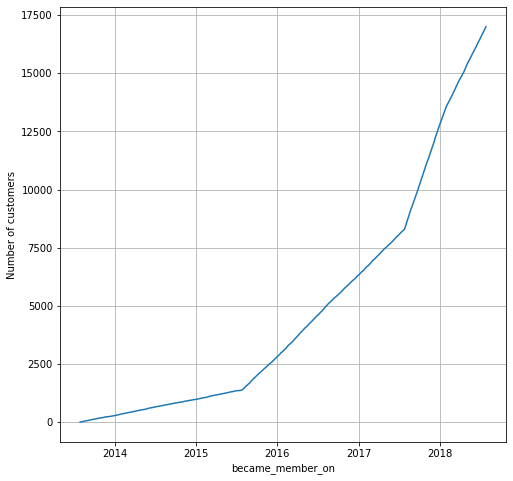

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
df_plot = profile.groupby(['became_member_on']).count()['id'].reset_index(drop=False)
df_plot['id'] = df_plot['id'].cumsum()
sns.lineplot(data=df_plot, x='became_member_on', y='id', ax=ax)
ax.grid(True)
ax.set_ylabel('Number of customers')

### 1.4 Income

Usually the varible `income` follows a long-tail distribution. However, since this is not the case, we shall fill the missing values with the median value. 

In [12]:
# profile['age'] = profile['age'].apply(lambda x: np.nan if x == float(118) else float(x))
profile['income'].fillna((profile['income'].median()), inplace=True)
profile.head()

,age,became_member_on,gender,id,income
0,54.393524,2017-02-12,O,68be06ca386d4c31939f3a4f0e3dd783,64000.0
1,55.000000,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,54.393524,2018-07-12,O,38fe809add3b4fcf9315a9694bb96ff5,64000.0
3,75.000000,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,54.393524,2017-08-04,O,a03223e636434f42ac4c3df47e8bac43,64000.0


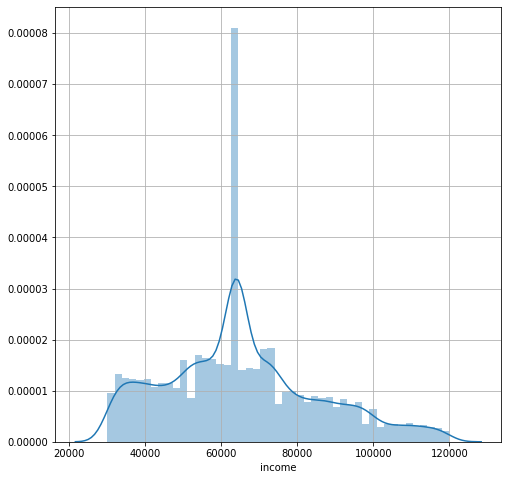

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(profile.dropna()['income'], ax=ax)
ax.grid(True)

### 1.5 ID

Changing column name

In [14]:
profile.rename({"id": "person"}, axis=1, inplace=True)

## 2. Processing portfolio

In [15]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


### 2.1 Channels

Creating separated columns for each channel

In [16]:
for channel in ['email', 'mobile', 'social', 'web']:
    portfolio[channel] = portfolio['channels'].apply(lambda x: 1 if channel in x else 0)
portfolio.drop(['channels'], axis=1, inplace=True)

### 2.2 Offer Type

Creating separated columns for each offer type

In [17]:
for offer in ['bogo', 'informational', 'discount']:
    portfolio[offer] = portfolio['offer_type'].apply(lambda x: 1 if offer in x else 0)
portfolio.drop(['offer_type'], axis=1, inplace=True)

### 2.3 Duration

Converting duration from days to hours

In [18]:
portfolio['duration'] = portfolio['duration']*24

### 2.4 Reward

Casting reward

In [19]:
portfolio['offered_reward'] = portfolio['reward'].astype(int)
portfolio.drop(['reward'], axis=1, inplace=True)

### 2.5 ID

Changing column name

In [20]:
portfolio.rename({'id': 'offer_id'}, axis=1, inplace=True)

In [21]:
portfolio.tail()

,difficulty,duration,offer_id,email,mobile,social,web,bogo,informational,discount,offered_reward
5,7,168,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,0,1,3
6,10,240,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,0,1,2
7,0,72,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,1,0,0
8,5,120,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0,5
9,10,168,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,0,1,2


## 3. Processing Transcript

In [22]:
import json
def get_offer_id(json_string):
    json_string = json_string.replace("'", '"').replace('offer_id', 'offer id')    
    if 'offer id' not in json_string:        
        return None
    
    return json.loads(json_string)['offer id']

get_offer_id(transcript['value'].astype(str)[306509])

'fafdcd668e3743c1bb461111dcafc2a4'

In [23]:
def get_reward(json_string):
    json_string = json_string.replace("'", '"')
    if 'reward' not in json_string:        
        return None
    
    return json.loads(json_string)['reward']

get_reward(transcript['value'].astype(str)[306509])

2

In [24]:
def get_amount(json_string):
    json_string = json_string.replace("'", '"')
    if 'amount' not in json_string:        
        return None
    
    return json.loads(json_string)['amount']

get_amount(transcript['value'].astype(str)[306515])

2.6

In [25]:
transcript['offer_id'] = transcript['value'].astype(str).apply(get_offer_id)
transcript['received_reward'] = transcript['value'].astype(str).apply(get_reward)
transcript['amount'] = transcript['value'].astype(str).apply(get_amount)

## Building Transactions Dataframe

In [26]:
log = pd.merge(transcript, portfolio, how='left', on='offer_id').sort_values(by=['person', 'time'])

In [37]:
first_offer = True
n_people = log["person"].nunique()

for index_person, person in enumerate(log["person"].unique()):
#     print ('{}/{}'.format(index_person, n_people))
    progbar.update_progress(index_person/n_people)
    
    df_person = log[log['person'] == person].reset_index(drop=True)    
    index_offer_received = df_person[df_person["event"] == "offer received"].index
    
    for index in index_offer_received:
        time = df_person.iloc[index]["time"]
        duration = df_person.iloc[index]["duration"]
        offer_id = df_person.iloc[index]["offer_id"]

        df_timeframe = df_person.query("(time >= @time and time <= @time+@duration)")
        df_timeframe = df_timeframe[df_timeframe["offer_id"].isin([offer_id, None])]
        future_purchase = 0
        
        if "offer viewed" in df_timeframe["event"].unique():    
            offer_viewed = 1
            time_to_viewed = list(df_timeframe.query("event == 'offer viewed'")["time"])[0]-time

        if "offer completed" in df_timeframe["event"].unique():    
            offer_completed = 1    
            time_completed = list(df_timeframe.query("event == 'offer completed'")["time"])[0]
            time_to_completed = time_completed-time
            amount = list(df_timeframe.query("event == 'transaction' and time == @time_completed")["amount"])[0]
            transaction_without_completion = 0
            
            if "transaction" in df_timeframe.query("time > @time_completed")["event"].unique():
                future_purchase = 1            
        else: 
            offer_completed = 0
            amount = 0
            time_to_completed = None
            if "transaction" in df_timeframe["event"].unique(): 
                transaction_without_completion = 1    

        offer = {"person": person, "time": time, "duration": duration, "offer_id": offer_id, 
            "offer_viewed": offer_viewed, "time_to_viewed": time_to_viewed, 
            "offer_completed": offer_completed, "time_to_completed": time_to_completed, "amount": amount, 
            "transaction_without_completion": transaction_without_completion, "future_purchase": future_purchase
        }

        if first_offer:
            df_offers = pd.DataFrame(columns = offer.keys())
            first_offer = False

        df_offers = df_offers.append(offer, ignore_index=True)

[1:31:36][##########] 99.99% 

In [38]:
df_offers = pd.merge(df_offers.drop("duration", axis=1), portfolio, on='offer_id', how="left")
df_offers = pd.merge(df_offers, profile, on='person', how="inner")
df_offers.tail()

,person,time,offer_id,offer_viewed,time_to_viewed,offer_completed,time_to_completed,amount,transaction_without_completion,future_purchase,...,social,web,bogo,informational,discount,offered_reward,age,became_member_on,gender,income
76272,ffff82501cea40309d5fdd7edcca4a07,168,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6,1,30,22.88,0,1,...,0,1,0,0,1,5,45.0,2016-11-25,F,62000.0
76273,ffff82501cea40309d5fdd7edcca4a07,336,2906b810c7d4411798c6938adc9daaa5,1,18,1,48,15.57,0,1,...,0,1,0,0,1,2,45.0,2016-11-25,F,62000.0
76274,ffff82501cea40309d5fdd7edcca4a07,408,2906b810c7d4411798c6938adc9daaa5,1,6,1,6,17.55,0,1,...,0,1,0,0,1,2,45.0,2016-11-25,F,62000.0
76275,ffff82501cea40309d5fdd7edcca4a07,504,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,30,1,0,7.79,0,1,...,0,1,1,0,0,5,45.0,2016-11-25,F,62000.0
76276,ffff82501cea40309d5fdd7edcca4a07,576,2906b810c7d4411798c6938adc9daaa5,1,6,1,0,14.23,0,1,...,0,1,0,0,1,2,45.0,2016-11-25,F,62000.0


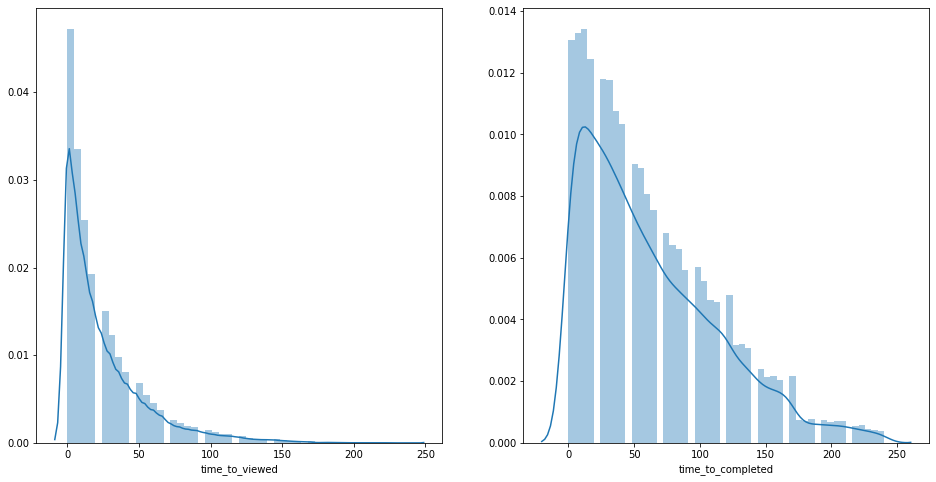

In [39]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,8))
sns.distplot(df_offers.dropna()['time_to_viewed'], ax=axes[0])
sns.distplot(df_offers.dropna()['time_to_completed'], ax=axes[1])
# ax.grid(True)

In [40]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = "black", width = 0.1),
      label = ["Offer Sent", "Social", "Web", "Mobile", "Email", "Purchase Completed", "Purchase Without Offer", "Future Purchases"],
      color = "purple"
    ),
    link = dict(
      source = [0, 0, 0, 0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7],        
      value = [df_offers['social'].sum(), 
              df_offers['web'].sum(), 
              df_offers['mobile'].sum(), 
              df_offers['email'].sum(), 
              df_offers.query("social == 1")["offer_completed"].sum(), 
              df_offers.query("web == 1")["offer_completed"].sum(),
              df_offers.query("mobile == 1")["offer_completed"].sum(),
              df_offers.query("email == 1")["offer_completed"].sum(),
              df_offers.query("social == 1")["transaction_without_completion"].sum(),
              df_offers.query("web == 1")["transaction_without_completion"].sum(),
              df_offers.query("mobile == 1")["transaction_without_completion"].sum(),
              df_offers.query("email == 1")["transaction_without_completion"].sum(),
              df_offers.query("offer_completed == 1")["future_purchase"].sum(),
              df_offers.query("transaction_without_completion == 1")["future_purchase"].sum(),]
  ))])

fig.update_layout(title_text="Marketing Funnel", font_size=10)

In [ ]:
df_offers["time_to_completed"].mean()

In [41]:

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = "black", width = 0.1),
      label = ["Offer Sent", "Time to View", "Time to Purchase"],
      color = "purple"
    ),
    link = dict(
      source = [0, 1], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [1, 2],        
      value = [df_offers["time_to_viewed"].mean(), 
              df_offers["time_to_completed"].mean()]
  ))])

fig.update_layout(title_text="Marketing Funnel", font_size=10)

In [44]:
df_offers.to_csv(os.path.join(data_dir, "df_offers.csv"), sep=';', index=None)

In [57]:
profile.to_csv(os.path.join(data_dir, "profile.csv"), sep=';', index=None)

## Creating Reward

In [50]:
df_offers.columns

Index(['person', 'time', 'offer_id', 'offer_viewed', 'time_to_viewed',
       'offer_completed', 'time_to_completed', 'amount',
       'transaction_without_completion', 'future_purchase', 'difficulty',
       'duration', 'email', 'mobile', 'social', 'web', 'bogo', 'informational',
       'discount', 'offered_reward', 'age', 'became_member_on', 'gender',
       'income'],
      dtype='object')

In [55]:
df_offers["reward"] = df_offers["offer_viewed"] + df_offers["offer_completed"]*df_offers["offered_reward"] + 2*df_offers["future_purchase"]

- Criar coluna `time_since_last_offer`
